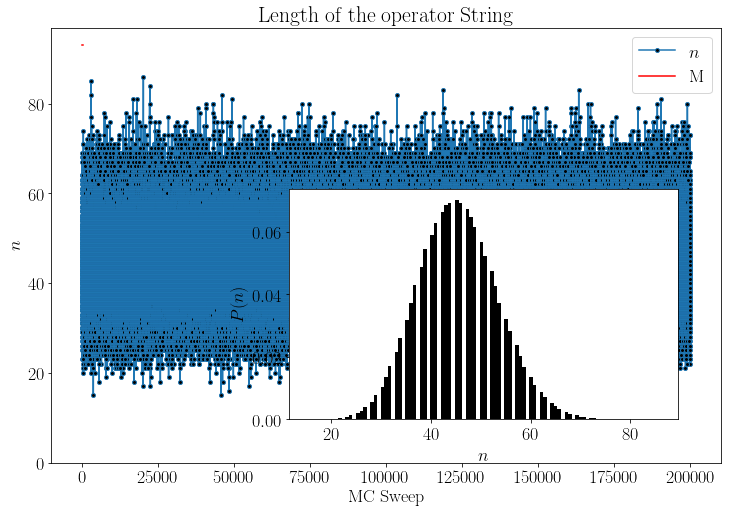

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# f="correlation_N_t1500_m0.080000.dat"
# A=np.loadtxt(f)
# a=np.mean(A,axis=0)
# err=np.std(A,axis=0)/np.sqrt(a.size)
# t=range(1,a.size+1)
# t=np.array(t)
# plt.errorbar(t,a,yerr=err,marker="o")
plt.figure(figsize=(9,6))
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.size'] = 18
f="./outfiles/opstring_L100_beta1.dat"
A=np.loadtxt(f)

fig=plt.figure(figsize=(12,8))
plt.errorbar(A[:,0],A[:,1],marker="o",markersize=4,capsize=4,mfc='k',ecolor='k',label="$n$")
plt.errorbar(A[:500,0],A[:500,2],capsize=4,color="r",label="$\\mathrm{M}$")
plt.title("$\\mathrm{Length \\;of\\; the\\; operator\\; String}$")
plt.ylabel("$n$",fontsize=18)
plt.ylim(0,)
plt.xlabel("$\\mathrm{MC \\;Sweep}$",fontsize=18)
plt.legend()

ax = fig.add_axes([0.4, 0.2, .45,.4 ])
ax.hist(A[200:,1],bins=100,density="True",color="k")
ax.set_ylabel("$P(n)$",fontsize=18)
ax.set_xlabel("$n$",fontsize=18)
plt.savefig("cut-off.pdf")



plt.show()

In [43]:
sizes=[50,100,150]
b=[1,4,16,64,128]
nbins=100
mcsteps=100000
beta=128
color=["tab:red","tab:blue","tab:green"]
outfile="energy.dat"
file= open(outfile,'w')
for L in sizes:
    for beta in b:
        f=f"./outfiles/opstring_L{L}_beta{beta}.dat"
        A=np.loadtxt(f)
        E= 0.25-A[:,1]/(L*beta)
        a=np.zeros(nbins)
        t=int(mcsteps/nbins)
        for i in range(0,nbins):
            a[i]=np.mean(E[i*t:(i+1)*t])

        energy=np.mean(a)
        error=np.std(a)
        
        file.write("%d %d %0.16f %0.16f\n"%(L,beta,energy,error))
file.close()

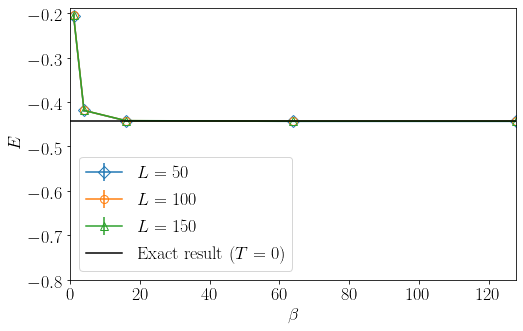

In [69]:
sizes=[50,100,150]
b=[1,4,16,64,128]
f="energy.dat"
A=np.loadtxt(f)
plt.figure(figsize=(8,5))
markers=["D","o","^"]
colors=["tab:green","tab:red","tab:blue"]
for i,L in enumerate(sizes):
    indx=A[:,0]==L
    plt.errorbar(A[:,1][indx],A[:,2][indx],yerr=A[:,3][indx],marker=markers[i],mfc="None",markersize=8,label="$L=%d$"%(L))

xx=np.arange(-2,150,5)
yy=np.ones(xx.size)
yy=yy*(-0.443148)
plt.errorbar(xx,yy,color="k",label="$\\mathrm{Exact\\;result}\\;(T=0)$")
# plt.title("$Energy$")
plt.xlim(0,128)
plt.ylabel("$E$",fontsize=18)
plt.ylim(-0.8,)
plt.xlabel("$\\beta$",fontsize=18)
plt.legend()
plt.savefig("Energy.pdf")
file.close()

In [84]:
sizes=[50,100,150]
b=[1,4,16,64,128]
nbins=100
mcsteps=100000
beta=128
color=["tab:red","tab:blue","tab:green"]
outfile="specific_heat.dat"
file= open(outfile,'w')
for L in sizes:
    for beta in b:
        f=f"./outfiles/opstring_L{L}_beta{beta}.dat"
        A=np.loadtxt(f)
        n= A[:,1]
        n2=n**2
        n_av=np.zeros(nbins)
        n2_av=np.zeros(nbins)
        t=int(mcsteps/nbins)
        for i in range(0,nbins):
            n_av[i]=np.mean(n[i*t:(i+1)*t])
            n2_av[i]=np.mean(n2[i*t:(i+1)*t])


        nav=np.mean(n_av)
        n2av=np.mean(n2_av)
        C=n2av-(nav**2) - nav
        file.write("%d %d %0.16f\n"%(L,beta,C))
file.close()


OSError: ./outfiles/opstring_L50_beta1.dat not found.

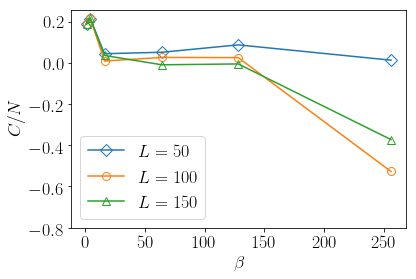

In [27]:
sizes=[50,100,150]
b=[1,4,16,64,128]
f="specific_heat.dat"
A=np.loadtxt(f)
markers=["D","o","^"]
colors=["tab:green","tab:red","tab:blue"]
for i,L in enumerate(sizes):
    indx=A[:,0]==L
    plt.plot(A[:,1][indx],A[:,2][indx]/L,marker=markers[i],mfc="None",markersize=8,label="$L=%d$"%(L))

# plt.title("$Energy$")
plt.ylabel("$C/N$",fontsize=18)
plt.ylim(-0.8,)
plt.xlabel("$\\beta$",fontsize=18)
plt.legend()
plt.savefig("C.pdf",bbox_inches="tight")
file.close()

In [25]:
sizes=[50,100,150]
b=[1,4,16,64,128,256]
nbins=100
mcsteps=2000000
beta=128
color=["tab:red","tab:blue","tab:green"]
outfile="specific_heat.dat"
file= open(outfile,'w')
for L in sizes:
    for beta in b:
        f=f"./outfiles2/opstring_L{L}_beta{beta}.dat"
        A=np.loadtxt(f)
        n= A[:,1]
        n2=A[:,3]
        n_av=np.zeros(nbins)
        n2_av=np.zeros(nbins)
        t=int(mcsteps/nbins)
        for i in range(0,nbins):
            n_av[i]=np.mean(n[i*t:(i+1)*t])
            n2_av[i]=np.mean(n2[i*t:(i+1)*t])


        nav=np.mean(n_av)
        n2av=np.mean(n2_av)
        print(n2av-(nav**2),nav)
        C=n2av-(nav**2) - nav
        file.write("%d %d %0.16f\n"%(L,beta,C))
file.close()


32.2511491382 22.7403765
144.452630159 133.786171
555.722212863 553.525887
2221.5706955 2219.018344
4442.70880758 4438.3638735
8877.12419826 8876.490578
64.2237443057 45.459767
289.355904229 267.5513495
1107.77934482 1106.949116
4438.76904909 4436.170367
8875.61661126 8873.111583
17693.9253646 17746.684565
96.3406026877 68.2019525
433.882823732 401.3137065
1665.75691789 1660.425716
6652.05392015 6653.52441
13307.9150732 13308.758737
26562.2577679 26618.1831375
